# Project tạo bản đồ trực quan hoá dữ liệu các thành phố ở bang California Mỹ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cities = pd.read_csv('/Users/nguyenthaohau/Desktop/MatplotLib/data/california_cities.csv')

In [3]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


Explanation about the dataset:
- Line of latitude - đường vĩ độ
- Line of longitude - đường kinh độ

![Latd and Longd](/Users/nguyenthaohau/Desktop/MatplotLib/im2.pgn)

In [8]:
# Extract Latd and Longd:
lat, lon = cities['latd'], cities['longd']
lon[:10]

0   -117.432778
1   -118.761667
2   -122.274444
3   -122.297778
4   -118.135000
5   -117.725556
6   -120.542500
7   -120.824167
8   -122.252500
9   -117.889722
Name: longd, dtype: float64

In [13]:
plt.style.use('seaborn')

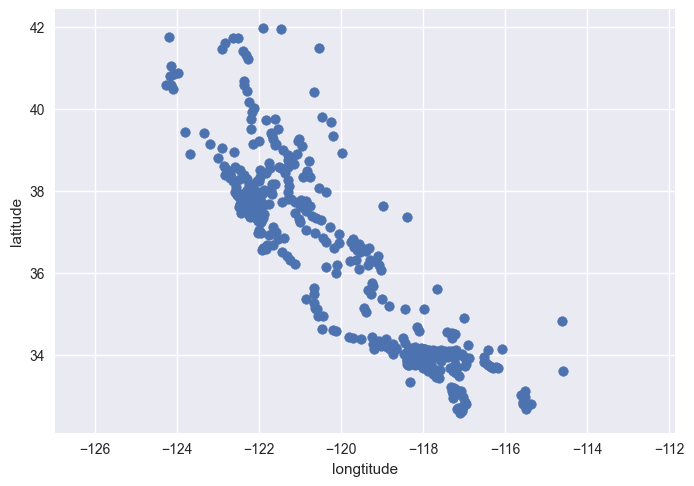

In [14]:
# Plot using Pyplot API:
plt.scatter(lon, lat);
plt.axis('equal');
plt.xlabel('longtitude')
plt.ylabel('latitude');

![Cali's map](/Users/nguyenthaohau/Desktop/MatplotLib/im4.pgn)

Biểu đồ trên không thể hiện được diện tích cũng như dân số nên người xem sẽ không biết thành phố nào có diện tích lớn/bé, dân số ntn. Vì vậy chúng ta cần bổ sung tham số cho hàm scatter để hiển thị cả population_total và area_total_km2

# Show the level of population in each city:

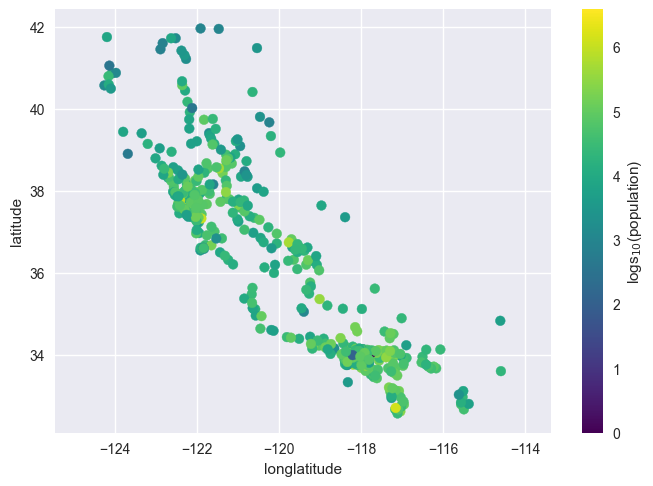

In [25]:
# Extract Latd and Longd:
lat, lon = cities['latd'], cities['longd']

# Extract population and area:
population, area = cities['population_total'], cities['area_total_km2']

# Plot using Pyplot API:
plt.scatter(lon, lat, c=np.log10(population), cmap='viridis')
plt.axis('equal');
plt.xlabel('longlatitude');
plt.ylabel('latitude');
plt.colorbar(label = 'logs$_{10}$(population)');

# Show the size of each city depending on the total area by km2:

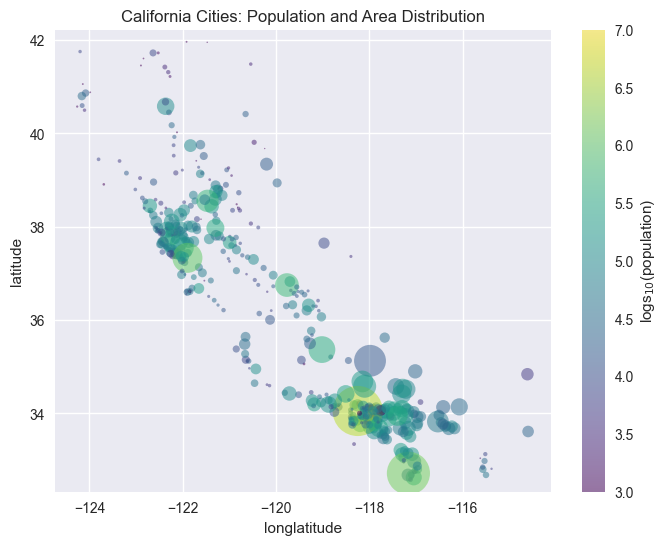

In [24]:
# Extract Latd and Longd:
lat, lon = cities['latd'], cities['longd']

# Extract population and area:
population, area = cities['population_total'], cities['area_total_km2']

plt.figure(figsize=(8,6))
# Plot using Pyplot API:
plt.scatter(lon, lat, 
            c=np.log10(population), cmap='viridis',
            s=area, linewidths=0, alpha=0.5)
plt.axis('equal');
plt.xlabel('longlatitude');
plt.ylabel('latitude');
plt.colorbar(label = 'logs$_{10}$(population)');
plt.clim(3,7); #limit the color bar

plt.title('California Cities: Population and Area Distribution');

# Label population and area of each city:

In [27]:
cities['area_total_km2'].sort_values(ascending=False)

239    1302.000
367     964.510
55      527.401
375     466.109
26      371.946
         ...   
163         NaN
237         NaN
370         NaN
393         NaN
443         NaN
Name: area_total_km2, Length: 482, dtype: float64

Check the max and min values of the total area column to choose the range to make the legend.

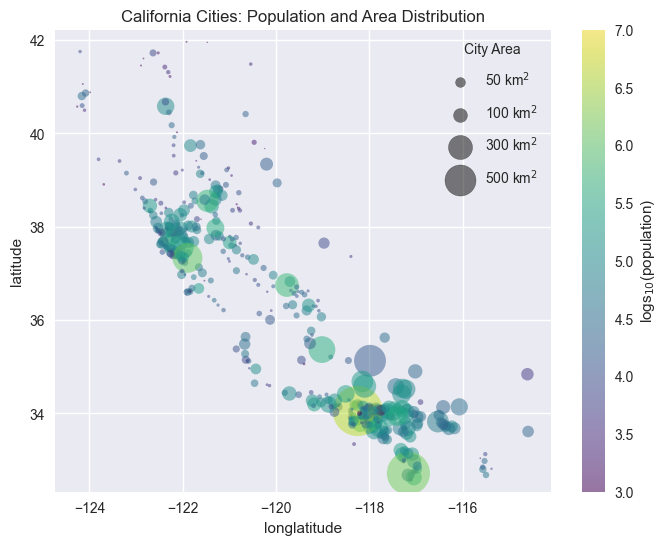

In [36]:
# Extract Latd and Longd:
lat, lon = cities['latd'], cities['longd']

# Extract population and area:
population, area = cities['population_total'], cities['area_total_km2']

plt.figure(figsize=(8,6))
# Plot using Pyplot API:
plt.scatter(lon, lat, 
            c=np.log10(population), cmap='viridis',
            s=area, linewidths=0, alpha=0.5)
plt.axis('equal');
plt.xlabel('longlatitude');
plt.ylabel('latitude');
plt.colorbar(label = 'logs$_{10}$(population)');
plt.clim(3,7); #limit the color bar

# create a legend for cities' sizes:
area_range = [50,100,300,500]

for area in area_range:
    plt.scatter([], [], s=area, alpha=0.5, c='k', 
                 label = str(area)+' km$^2$')

plt.legend(scatterpoints = 1, labelspacing=1, title = 'City Area')

plt.title('California Cities: Population and Area Distribution');

Looking at the figure, we can check the total area of each city to see the approximate km2 of each cities and which groups of size this city belongs to.